In [1]:
import numpy as np
!gdown 1ZdhRqYv-JizWV6DxO6C4R_k1kxPhmlF2

Downloading...
From: https://drive.google.com/uc?id=1ZdhRqYv-JizWV6DxO6C4R_k1kxPhmlF2
To: S:\Machine Learning Scaler\9  K-Nearest Neighbors (KNN)\multiclass.csv

  0%|          | 0.00/14.6k [00:00<?, ?B/s]
100%|##########| 14.6k/14.6k [00:00<00:00, 16.9MB/s]


In [1]:
import pandas as pd

In [2]:
df =pd.read_csv('multiclass.csv')
df.head()

,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,class
0,3,12669,9656,7561,214,2674,1338,2
1,3,7057,9810,9568,1762,3293,1776,2
2,3,6353,8808,7684,2405,3516,7844,2
3,3,13265,1196,4221,6404,507,1788,1
4,3,22615,5410,7198,3915,1777,5185,1


In [59]:
X=df[['Region',	'Fresh',	'Milk',	'Grocery',	'Frozen',	'Detergents_Paper',	'Delicassen'	]].copy()
y=df[['class']].copy()

In [60]:
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

X_train_val, X_test, y_train_val, y_test = train_test_split(X,y,test_size=0.25, random_state=42)

X_train, X_val, y_train, y_val = train_test_split(X_train_val,y_train_val,test_size=0.25, random_state=42)

<Axes: xlabel='class', ylabel='Count'>

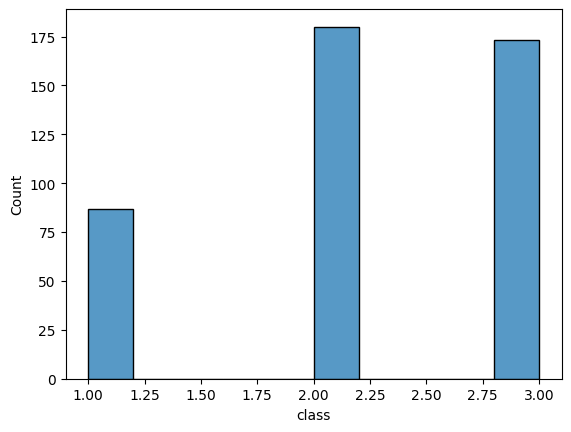

In [62]:
import seaborn as sns

sns.histplot(df['class'])

In [61]:
print(X_train.shape, y_train.shape)
print(X_val.shape, y_val.shape)
print(X_test.shape, y_test.shape)

(247, 7) (247, 1)
(83, 7) (83, 1)
(110, 7) (110, 1)


In [63]:
from imblearn.over_sampling import SMOTE

# Create an instance of SMOTE
smt = SMOTE()

X_sm, y_sm = smt.fit_resample(X_train, y_train)

In [64]:
from sklearn.preprocessing import StandardScaler

st =  StandardScaler()

X_sm = st.fit_transform(X_sm.values)
X_val_scaled = st.transform(X_val.values)
X_test_scaled = st.transform(X_test.values)

y_sm = y_sm.values[:,0]
y_val = y_val.values[:,0]
y_test = y_test.values[:,0]

In [69]:
X_val_scaled[50]

array([ 0.68589186, -0.61173672, -0.45683831, -0.65659127, -0.33734694,
       -0.49907024, -0.29451594])

In [72]:
import numpy as np
dist = np.sqrt(np.sum((X_val_scaled[50]-X_sm)**2 , axis=1))

print(dist.shape)

(297,)


In [73]:
distances = [(dist[i],y_sm[i]) for i in range(len(dist))]
distances = sorted(distances)

In [78]:
distances = distances[:5]

In [86]:
distances = np.array(distances)

classes_counts = np.unique(distances[:,1],return_counts=True)

index = classes_counts[1].argmax()
pred = classes_counts[0][index]
pred

np.float64(3.0)

In [87]:
def knn(X,Y,queryPoint,k):
    """Predict the class label for the query point"""
    # Euclidean Distance
    dist = np.sqrt(np.sum((queryPoint-X)**2,axis=1) )

    # Storing distance and Class labels together
    distances = [(dist[i],Y[i]) for i in range(len(dist)) ]
    # sort the distances
    distances = sorted(distances)
    # Nearest/First K points
    distances = distances[:k]

    distances = np.array(distances)

    classes_counts = np.unique(distances[:,1],return_counts=True)

    index = classes_counts[1].argmax()
    pred = classes_counts[0][index]

    return int(pred),distances

In [88]:
pred,neighbors = knn(X_sm, y_sm, X_val_scaled[50],5)

print(f'k nearest neighbors with the distance and class label :{neighbors}')

print(f'The predicted class label: {pred}')

k nearest neighbors with the distance and class label :[[0.20093804 3.        ]
 [0.21092341 3.        ]
 [0.22869486 3.        ]
 [0.28377819 3.        ]
 [0.29568564 3.        ]]
The predicted class label: 3


In [89]:
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt

In [90]:
knn = KNeighborsClassifier(n_neighbors=5,metric='euclidean')

knn.fit(X_sm, y_sm)


KNeighborsClassifier(metric='euclidean')

In [91]:
knn.score(X_val_scaled, y_val)

0.8795180722891566